# Handwritten digits

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # suppress most warnings in TensorFlow
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Init Plugin
Init Graph Optimizer
Init Kernel


## From Wednesday
Here is some of the code from Wednesday.  We made a bunch of different choices regarding how to build our neural network.  Everything can be customized:
* The structure of the network (how many layers, how many neurons)
* What activation function to use (can use a different one on each layer): [activations in Keras](https://keras.io/api/layers/activations/)
* What loss function to use: [losses in Keras](https://keras.io/api/losses/)
* What optimizer to use: [optimizers in Keras](https://keras.io/api/optimizers/)

In [3]:
X = [[0,0],
    [1,0],
    [0,1],
    [1,1]]

y = [0,1,1,1]

In [10]:
model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape = (2,)),
        keras.layers.Dense(1,activation="sigmoid")
    ]
)

In [11]:
model.compile(loss="binary_crossentropy", 
              optimizer=keras.optimizers.SGD(
                    learning_rate=0.5
                ),
              metrics=["accuracy"])

In [12]:
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 123ms/step - loss: 1.2186 - accuracy: 0.2500
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.9992 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.8427 - accuracy: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.7356 - accuracy: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6630 - accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6128 - accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5768 - accuracy: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5500 - accuracy: 0.7500
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5290 - accuracy: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5120 - accuracy: 0.7500
Epoch 11/100
1/1 [=====

In [ ]:
model.fit(X,y,epochs=300)

In [15]:
model.get_weights()

[array([[5.768819],
        [5.762476]], dtype=float32),
 array([-2.3936265], dtype=float32)]

## Handwritten digits

In [16]:
mnist = keras.datasets.mnist
(X_train, y_train), _ = mnist.load_data()

In [17]:
type(X_train)

numpy.ndarray

In [18]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[13443]

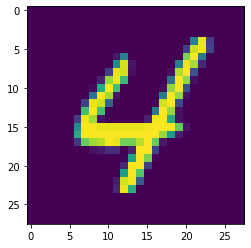

In [21]:
fig, ax = plt.subplots()
ax.imshow(X_train[13443])

In [22]:
y_train[13443]

4

In [23]:
model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape = (28,28)),
        keras.layers.Flatten(),
        keras.layers.Dense(16, activation="sigmoid"),
        keras.layers.Dense(16, activation="sigmoid"),
        keras.layers.Dense(10,activation="softmax")
    ]
)

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=keras.optimizers.SGD(
                    learning_rate=0.01
                ),
              metrics=["accuracy"])

In [26]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.0010 - accuracy: 0.5122
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4392 - accuracy: 0.7440
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0489 - accuracy: 0.7926
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8360 - accuracy: 0.8188
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7244 - accuracy: 0.8298


In [28]:
model.predict(X_train[:3])

array([[2.4307232e-01, 2.0920760e-03, 1.3787783e-02, 1.6087678e-01,
        4.1176742e-03, 4.3604153e-01, 4.3476820e-03, 4.9278371e-02,
        8.0414616e-02, 5.9711891e-03],
       [8.5219198e-01, 1.8428791e-04, 1.1425381e-02, 1.4687748e-02,
        8.0659436e-03, 7.3573150e-02, 1.3238099e-02, 1.8934209e-02,
        4.0254141e-03, 3.6737735e-03],
       [3.9344206e-03, 1.7115653e-02, 2.3694383e-03, 3.9221961e-03,
        8.6025202e-01, 7.0375353e-03, 3.1003820e-02, 7.4836127e-03,
        2.8285417e-03, 6.4052746e-02]], dtype=float32)

In [30]:
model.predict(X_train[:3]).argmax(axis=1)

array([5, 0, 4])

In [29]:
model.predict(X_train[:3]).sum(axis=1)

array([1., 1., 1.], dtype=float32)

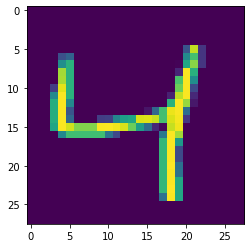

In [34]:
ax.imshow(X_train[2])
fig

In [35]:
model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape = (28,28)),
        keras.layers.Flatten(),
        keras.layers.Dense(16, activation="sigmoid"),
        keras.layers.Dense(16, activation="sigmoid"),
        keras.layers.Dense(10,activation="softmax")
    ]
)

In [38]:
# Too big learning rate
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=keras.optimizers.SGD(
                    learning_rate=4
                ),
              metrics=["accuracy"])

In [39]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2834 - accuracy: 0.1316
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3334 - accuracy: 0.1122
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3110 - accuracy: 0.1152
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2966 - accuracy: 0.1195
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2967 - accuracy: 0.1185
